# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
# citipy is a Python library that provides functionality to determine the nearest city based on latitude and longitude 
# coordinates. It uses a database of city locations to perform this task efficiently.

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) 
# can i change this to a number not index
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) # lng_range[0] min, lng_range[1] max
# Combines the lats & lngs arrays into a sequence of (latitude, longitude) tuples
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
     # citipy.nearest_city() returns an object representing the nearest city. 
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name # 1st & 2nd element of the tuple
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city) # If city name is not in the cities list, it's appended to the list

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0 #重置为0 开始新一组的记录计数

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | badger
Processing Record 2 of Set 1 | tonekabon
Processing Record 3 of Set 1 | happy valley-goose bay
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | suhut
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | taulaga
Processing Record 8 of Set 1 | kamaishi
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | fort bragg
Processing Record 12 of Set 1 | villa gesell
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | mossel bay
Processing Record 15 of Set 1 | guerrero negro
Processing Record 16 of Set 1 | balikpapan
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | siwa oasis
Processing Record 19 of Set 1 | kismayo
Processing Record 20 of Set 1 | isafjordur
Processing Record 21 of Set 1 | jamestown
Processing Record 22

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
 
# Show Record Count
city_data_df.count()
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,badger,64.8000,-147.5333,20.95,61,75,2.06,US,1720759198
1,tonekabon,36.8163,50.8738,27.97,70,0,3.26,IR,1720759198
2,happy valley-goose bay,53.3168,-60.3315,12.17,82,0,1.54,CA,1720759198
3,bredasdorp,-34.5322,20.0403,9.64,83,72,2.44,ZA,1720759198
4,suhut,38.5311,30.5458,22.10,59,0,0.95,TR,1720759198
...,...,...,...,...,...,...,...,...,...
567,trakai,54.6333,24.9333,20.19,95,100,1.14,LT,1720759269
568,teguise,29.0605,-13.5640,19.12,88,0,11.32,ES,1720759269
569,kupino,54.3663,77.2981,25.28,59,30,2.59,RU,1720759269
570,illizi,26.4833,8.4667,27.89,17,0,4.10,DZ,1720759269


In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,badger,64.8000,-147.5333,20.95,61,75,2.06,US,1720759198
1,tonekabon,36.8163,50.8738,27.97,70,0,3.26,IR,1720759198
2,happy valley-goose bay,53.3168,-60.3315,12.17,82,0,1.54,CA,1720759198
3,bredasdorp,-34.5322,20.0403,9.64,83,72,2.44,ZA,1720759198
4,suhut,38.5311,30.5458,22.10,59,0,0.95,TR,1720759198


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,20.95,61,75,2.06,US,1720759198
1,tonekabon,36.8163,50.8738,27.97,70,0,3.26,IR,1720759198
2,happy valley-goose bay,53.3168,-60.3315,12.17,82,0,1.54,CA,1720759198
3,bredasdorp,-34.5322,20.0403,9.64,83,72,2.44,ZA,1720759198
4,suhut,38.5311,30.5458,22.10,59,0,0.95,TR,1720759198


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

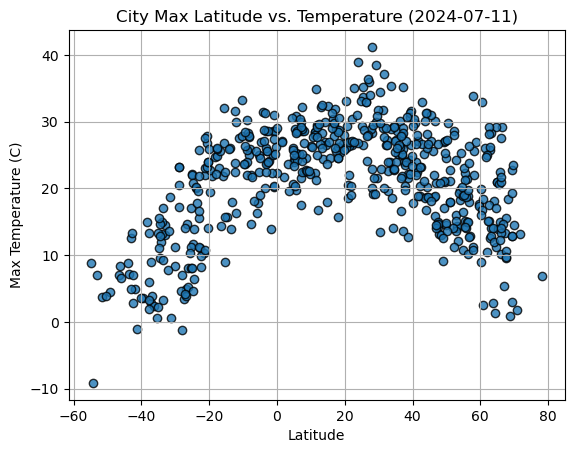

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

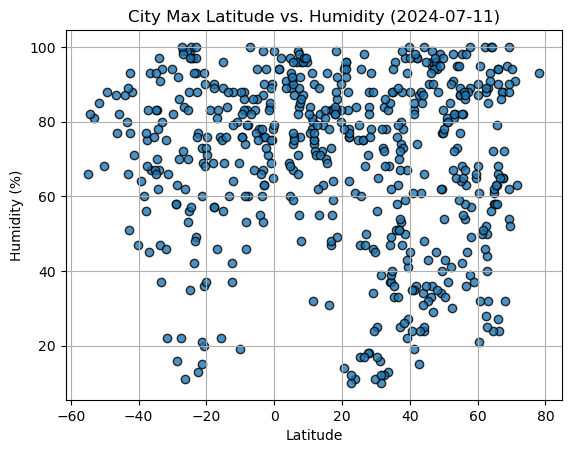

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

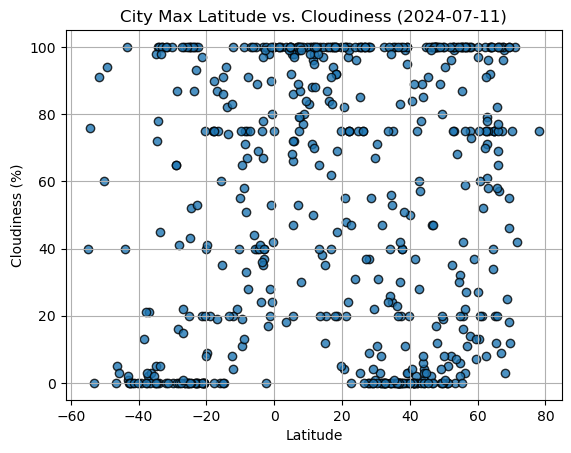

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

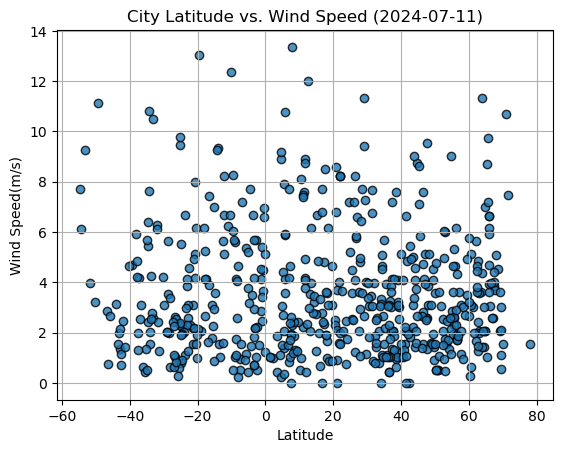

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, title, xlabel, ylabel):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.scatter(x, y, edgecolor='black')
    plt.plot(x, regress_values, 'r-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.annotate(line_eq,(min(x)+1, max(y)-1), fontsize=15, color="red")
    plt.show()
    print(f"The r-value is: {rvalue}")

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,20.95,61,75,2.06,US,1720759198
1,tonekabon,36.8163,50.8738,27.97,70,0,3.26,IR,1720759198
2,happy valley-goose bay,53.3168,-60.3315,12.17,82,0,1.54,CA,1720759198
4,suhut,38.5311,30.5458,22.10,59,0,0.95,TR,1720759198
7,kamaishi,39.2667,141.8833,24.22,67,100,3.04,JP,1720759199


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,bredasdorp,-34.5322,20.0403,9.64,83,72,2.44,ZA,1720759198
5,port alfred,-33.5906,26.8910,17.13,47,45,4.24,ZA,1720759198
6,taulaga,-11.0553,-171.0883,27.51,80,22,6.22,AS,1720759199
9,invercargill,-46.4000,168.3500,8.34,77,5,0.74,NZ,1720759199
11,villa gesell,-37.2639,-56.9730,2.81,83,2,4.17,AR,1720759199


###  Temperature vs. Latitude Linear Regression Plot

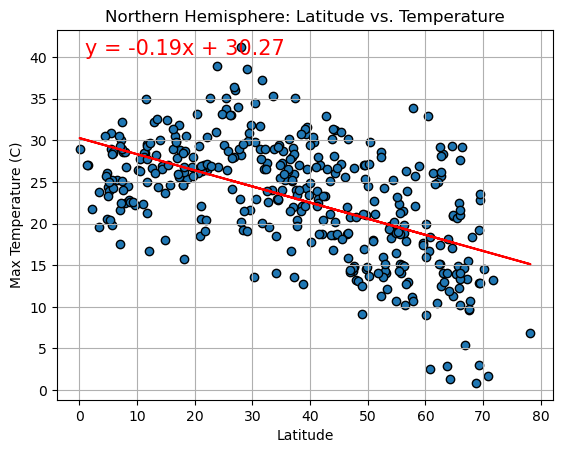

The r-value is: -0.5454822490849923


In [52]:
# Linear regression on Northern Hemisphere 
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],
                       'Northern Hemisphere: Latitude vs. Temperature', 'Latitude', 'Max Temperature (C)')

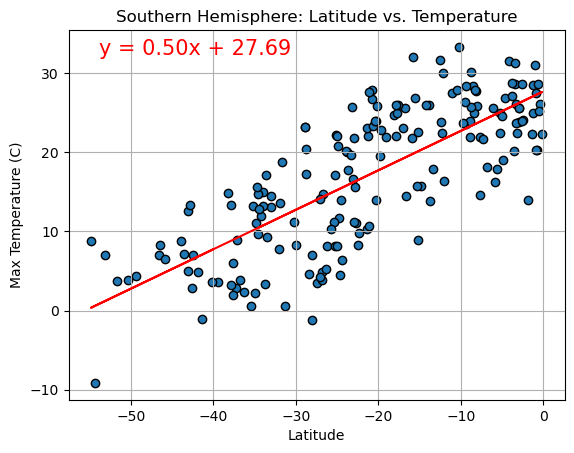

The r-value is: 0.7680287814002466


In [53]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],
                       'Southern Hemisphere: Latitude vs. Temperature', 'Latitude', 'Max Temperature (C)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

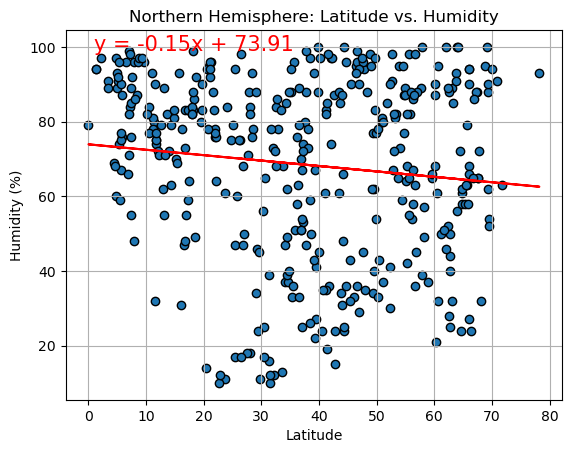

The r-value is: -0.11742596218135638


In [54]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],
                       'Northern Hemisphere: Latitude vs. Humidity', 'Latitude', 'Humidity (%)')

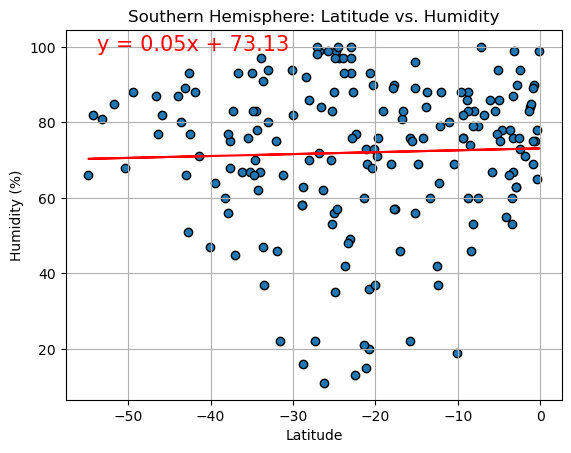

The r-value is: 0.0347855550899449


In [55]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],
                       'Southern Hemisphere: Latitude vs. Humidity', 'Latitude', 'Humidity (%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

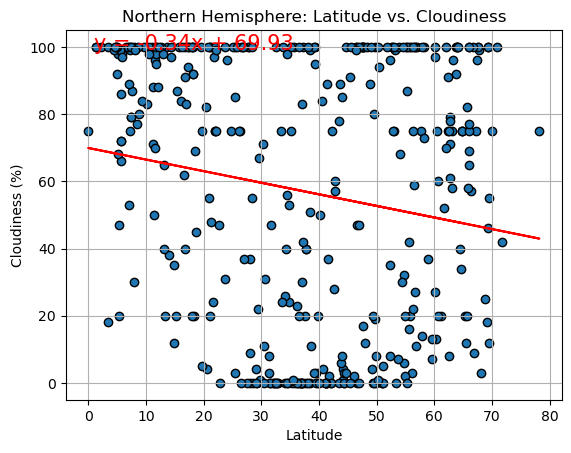

The r-value is: -0.16883024859728996


In [56]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],
                       'Northern Hemisphere: Latitude vs. Cloudiness', 'Latitude', 'Cloudiness (%)')


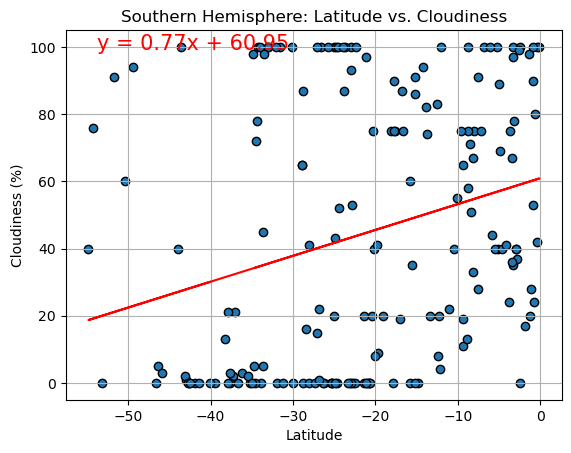

The r-value is: 0.2715828537386565


In [58]:
# Southern Hemisphere 
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],
                       'Southern Hemisphere: Latitude vs. Cloudiness', 'Latitude', 'Cloudiness (%)')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

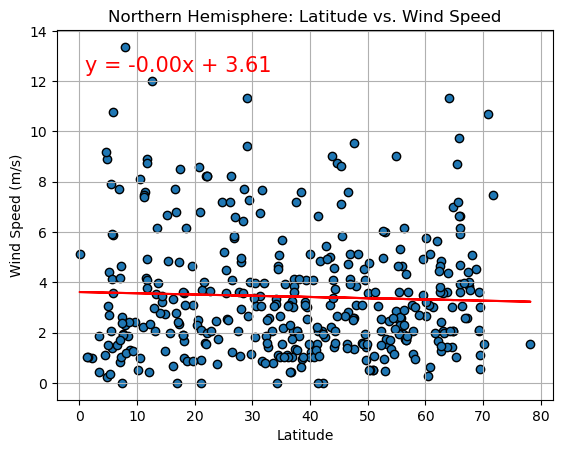

The r-value is: -0.03961224306116881


In [59]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],
                       'Northern Hemisphere: Latitude vs. Wind Speed', 'Latitude', 'Wind Speed (m/s)')


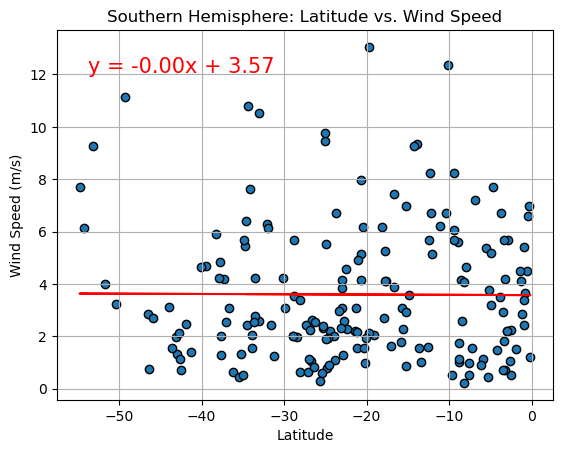

The r-value is: -0.005685784008320288


In [60]:
# Southern Hemisphere 
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],
                       'Southern Hemisphere: Latitude vs. Wind Speed', 'Latitude', 'Wind Speed (m/s)')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

jvnfjdnf
esc then m
